In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import ElasticNet,Lasso,Ridge,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
df = pd.read_csv('Train_cars.csv')
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46 kmpl,1248 CC,100 bhp,5.0,43.65 Lakh,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.6 kmpl,2993 CC,61 bhp,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.3 kmpl,1599 CC,140 bhp,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47 kmpl,1196 CC,86.8 bhp,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12 kmpl,1999 CC,115 bhp,7.0,13.26 Lakh,33.04


In [4]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,22500.000000,22500.000000,22408.000000,22500.000000
mean,2011.819378,49109.527556,5.352330,6.359158
std,2.663807,21746.602938,0.842943,7.302764
min,2001.000000,171.000000,4.000000,0.440000
25%,2010.000000,35833.250000,5.000000,2.290000
50%,2012.000000,47991.000000,5.000000,3.510000
75%,2014.000000,59696.500000,5.000000,6.590000
max,2018.000000,253494.000000,8.000000,71.600000


In [5]:
df[['Mileage','mUnits']] = df['Mileage'].str.split(expand=True)

In [6]:
df['Mileage'] = df['Mileage'].astype('float')

In [7]:
df['mUnits'].value_counts()

kmpl     20235
km/kg     2173
Name: mUnits, dtype: int64

In [8]:
df['Engine'] = df['Engine'].str.strip('CC')

In [9]:
df['Engine'] = df['Engine'].astype('float')

In [12]:
df['Power'] = df['Power'].replace('null ',np.nan)
df['Power'] = df['Power'].replace('null',np.nan)

In [13]:
df['Power'] = df['Power'].str.strip('bhp')
df['Power'] = df['Power'].astype('float')

In [14]:
df[['New_Price','pUnits']] = df['New_Price'].str.split(expand=True)

In [15]:
df['New_Price'] = df['New_Price'].astype('float')

In [16]:
df['pUnits'].value_counts()

Lakh    3802
Cr        79
Name: pUnits, dtype: int64

In [17]:
df[df['pUnits'] == 'Lakh'].head(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mUnits,pUnits
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46,1248.0,100.00,5.0,43.65,25.53,kmpl,Lakh
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12,1999.0,115.00,7.0,13.26,33.04,kmpl,Lakh
12,Ford Fiesta 1.4 ZXi TDCi ABS,Coimbatore,2017,44928,Petrol,Automatic,First,16.95,1998.0,113.98,7.0,5.68,7.45,kmpl,Lakh
17,Maruti Celerio VXI AT,Hyderabad,2013,41464,Diesel,Manual,First,13.10,2494.0,282.00,5.0,8.61,1.65,kmpl,Lakh
18,Maruti Swift Dzire 1.2 Lxi BSIV,Chennai,2010,53222,Petrol,Automatic,First,23.84,1599.0,147.60,7.0,79.43,3.41,kmpl,Lakh
23,Maruti Alto K10 VXI AGS,Kolkata,2014,38277,Petrol,Manual,First,17.00,1364.0,121.30,5.0,5.61,4.30,km/kg,Lakh
34,Hyundai Creta 1.6 CRDi AT SX Plus,Kochi,2011,25453,Diesel,Automatic,First,22.48,2996.0,88.50,4.0,45.36,6.32,kmpl,Lakh
42,Hyundai Santro GLS II - Euro II,Kolkata,2014,33391,Diesel,Manual,First,12.80,1586.0,174.50,5.0,8.61,7.59,kmpl,Lakh
52,Hyundai Santro Xing GLS,Chennai,2013,48158,CNG,Manual,First,17.80,1248.0,335.30,5.0,7.52,3.37,kmpl,Lakh
56,Toyota Corolla H4,Jaipur,2009,109884,Petrol,Manual,First,14.80,1193.0,NaN,5.0,10.81,1.65,kmpl,Lakh


In [18]:
df['pUnits'] = df['pUnits'].replace(['Lakh','Cr'],[1,100])

In [19]:
df['New_Price'] = df['New_Price']*df['pUnits']

In [20]:
df.drop('pUnits',1,inplace=True)

In [21]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mUnits
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,43.65,25.53,kmpl
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,NaN,4.58,kmpl
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.30,1599.0,140.0,5.0,NaN,2.37,kmpl
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47,1196.0,86.8,5.0,NaN,1.20,kmpl
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12,1999.0,115.0,7.0,13.26,33.04,kmpl


In [22]:
df['Fuel_Type'].value_counts()

Petrol      10155
Diesel      10004
CNG          2303
LPG            24
Electric       14
Name: Fuel_Type, dtype: int64

In [23]:
df['mUnits'].value_counts()

kmpl     20235
km/kg     2173
Name: mUnits, dtype: int64

In [24]:
df[(df['mUnits'] == 'km/kg')]['Fuel_Type'].value_counts()

Petrol      1329
Diesel       636
CNG          206
LPG            1
Electric       1
Name: Fuel_Type, dtype: int64

In [25]:
df = df[~((df['mUnits'] == 'km/kg')&(df['Fuel_Type'] == 'Electric'))]

In [26]:
l = []
for i in df.index:
    if df['mUnits'][i] == 'kmpl':
        l.append(1)
    elif (df['mUnits'][i] == 'km/kg') & (df['Fuel_Type'][i] == 'Petrol'):
        l.append(1/1.36)
    elif (df['mUnits'][i] == 'km/kg') & (df['Fuel_Type'][i] == 'Diesel'):
        l.append(1/1.16)
    elif (df['mUnits'][i] == 'km/kg') & (df['Fuel_Type'][i] == 'CNG'):
        l.append(1/5.56)
    elif (df['mUnits'][i] == 'km/kg') & (df['Fuel_Type'][i] == 'LPG'):
        l.append(1/1.96)
    else:
        l.append(np.nan)

In [27]:
len(df['mUnits'])

22499

In [28]:
len(l)

22499

In [29]:
df['mUnits'] = l

In [30]:
df['Mileage'] = df['Mileage']*df['mUnits']

In [31]:
df.drop('mUnits',1,inplace=True)

In [32]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti 800 Std BSIII,Bangalore,2012,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,43.65,25.53
1,Honda City 1.5 V AT,Delhi,2013,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,NaN,4.58
2,Honda CR-V RVi MT,Delhi,2007,16460,CNG,Manual,Third,15.30,1599.0,140.0,5.0,NaN,2.37
3,Skoda Yeti Ambition 4X2,Kolkata,2009,35048,Petrol,Manual,First,25.47,1196.0,86.8,5.0,NaN,1.20
4,Hyundai i10 Magna LPG,Coimbatore,2013,41656,Petrol,Automatic,First,19.12,1999.0,115.0,7.0,13.26,33.04


In [33]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,22499.000000,22499.000000,22407.000000,22462.000000,21702.000000,22407.000000,3881.000000,22499.000000
mean,2011.819281,49110.846749,17.659631,1637.347164,117.014640,5.352345,20.162950,6.359315
std,2.663827,21746.185914,4.638494,667.998435,65.210447,0.842959,25.548425,7.302888
min,2001.000000,171.000000,0.000000,72.000000,34.200000,4.000000,3.910000,0.440000
25%,2010.000000,35836.500000,14.460000,1197.000000,73.000000,5.000000,8.610000,2.290000
50%,2012.000000,47991.000000,17.800000,1493.000000,94.680000,5.000000,9.100000,3.510000
75%,2014.000000,59699.000000,20.700000,1995.000000,143.000000,5.000000,19.910000,6.590000
max,2018.000000,253494.000000,28.913793,5998.000000,560.000000,8.000000,230.000000,71.600000


In [34]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,22499,22499,22499,22499,22499
unique,1204,11,5,2,4
top,Maruti Wagon R LXI CNG,Mumbai,Petrol,Manual,First
freq,142,4386,10155,18045,20257


In [35]:
df['Name'].value_counts()

Maruti Wagon R LXI CNG                     142
Maruti Swift VDI                           133
Honda City 1.5 S MT                        131
Hyundai i10 Sportz                         114
BMW 3 Series 320d                          111
                                          ... 
BMW 5 Series 2013-2017 525d Luxury Line      1
Honda Amaze S i-DTEC                         1
Volkswagen Beetle 2.0                        1
Toyota Camry A/T                             1
Toyota Etios VXD                             1
Name: Name, Length: 1204, dtype: int64

In [36]:
df[df['Name'] == 'Maruti Wagon R LXI CNG']['New_Price'].value_counts().index[0]

8.61

In [37]:
m = dict()
for i in df['Name'].value_counts().index:
    if df[df['Name'] == i]['New_Price'].nunique() == 0:
        m[i] = np.nan
    else:
        m[i] = df[df['Name'] == i]['New_Price'].value_counts().index[0]

In [38]:
df.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                 92
Engine                  37
Power                  797
Seats                   92
New_Price            18618
Price                    0
dtype: int64

In [39]:
df['NP'] = df['Name'].map(m)

In [40]:
df['New_Price'].fillna(df['NP'],inplace=True)

In [41]:
df.drop('NP',1,inplace=True)

In [42]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                92
Engine                 37
Power                 797
Seats                  92
New_Price            1265
Price                   0
dtype: int64

In [43]:
m = dict()
for i in df['Name'].value_counts().index:
    m[i] = df[df['Name'] == i]['Engine'].median()

In [44]:
df['E'] = df['Name'].map(m)
df['Engine'].fillna(df['E'],inplace=True)

In [45]:
df[df['Name'] == 'Maruti Wagon R LXI CNG']['Seats'].median()

5.0

In [46]:
m = dict()
for i in df['Name'].value_counts().index:
    m[i] = df[df['Name'] == i]['Seats'].median()

In [47]:
df['S'] = df['Name'].map(m)
df['Seats'].fillna(df['S'],inplace=True)

In [48]:
df.drop(['E','S'],1,inplace=True)

In [49]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                92
Engine                  0
Power                 797
Seats                   0
New_Price            1265
Price                   0
dtype: int64

In [50]:
df[df['Name'] == 'Maruti Wagon R LXI CNG']['Power'].median()

82.0

In [51]:
m = dict()
for i in df['Name'].value_counts().index:
    m[i] = df[df['Name'] == i]['Power'].median()
df['P'] = df['Name'].map(m)
df['Power'].fillna(df['P'],inplace=True)
df.drop('P',1,inplace=True)

In [52]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                92
Engine                  0
Power                   1
Seats                   0
New_Price            1265
Price                   0
dtype: int64

In [53]:
df[df['New_Price'].isnull()]['Name'].value_counts()

Maruti Ciaz Alpha                       53
Hyundai Xcent 1.2 Kappa S Option CNG    43
Maruti Wagon R Vx                       41
Maruti Wagon R Duo Lxi                  38
Mercedes-Benz GLE 250d                  35
                                        ..
BMW 7 Series 2007-2012 730Ld             1
Hyundai Verna 1.6 CRDi EX MT             1
Mahindra Scorpio VLX 2.2 mHawk BSIII     1
Maruti Baleno Alpha CVT                  1
Honda Amaze VX i-Vtech                   1
Name: Name, Length: 136, dtype: int64

In [54]:
len(df)

22499

In [55]:
df.isnull().sum()/len(df)*100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.408907
Engine               0.000000
Power                0.004445
Seats                0.000000
New_Price            5.622472
Price                0.000000
dtype: float64

In [56]:
df = df.dropna()

In [57]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

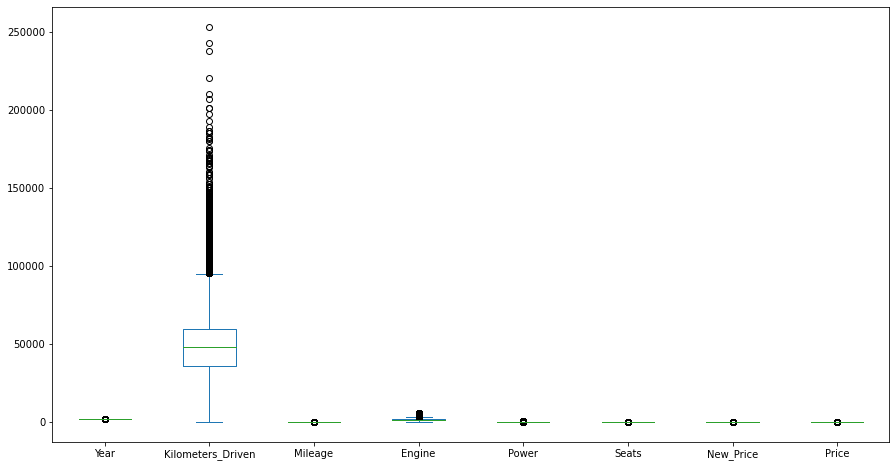

In [58]:
df.plot(kind='box')
plt.show()

In [59]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000,21150.000000
mean,2011.863688,48942.397258,17.672005,1644.024444,116.741706,5.356028,18.553905,6.439464
std,2.651455,21659.706121,4.640743,668.631007,64.642064,0.846012,24.065918,7.360637
min,2001.000000,171.000000,0.000000,72.000000,34.200000,4.000000,3.910000,0.440000
25%,2010.000000,35738.000000,14.420000,1197.000000,73.000000,5.000000,8.610000,2.300000
50%,2012.000000,47882.000000,17.800000,1496.000000,95.000000,5.000000,8.610000,3.580000
75%,2014.000000,59548.750000,20.700000,1995.000000,141.100000,5.000000,15.360000,6.730000
max,2018.000000,253494.000000,28.913793,5998.000000,560.000000,8.000000,230.000000,71.600000


In [60]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,21150,21150,21150,21150,21150
unique,1068,11,5,2,4
top,Maruti Wagon R LXI CNG,Mumbai,Diesel,Manual,First
freq,141,3987,9563,16878,19087


In [61]:
df_num = df.select_dtypes(np.number)
df_cat = df.select_dtypes('O')

In [62]:
df.drop('Name',1,inplace=True)
df_cat.drop('Name',1,inplace=True)

In [63]:
df['Location'].value_counts()

Mumbai        3987
Hyderabad     3654
Kolkata       3297
Chennai       2229
Jaipur        1615
Delhi         1415
Bangalore     1227
Kochi         1095
Coimbatore    1031
Pune           937
Ahmedabad      663
Name: Location, dtype: int64

In [64]:
LE = LabelEncoder()
df['Location'] = LE.fit_transform(df['Location'])

In [65]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,2012,33715,Diesel,Manual,First,16.46,1248.0,100.0,5.0,43.65,25.53
1,4,2013,73977,Diesel,Manual,First,18.60,2993.0,61.0,4.0,14.23,4.58
2,4,2007,16460,CNG,Manual,Third,15.30,1599.0,140.0,5.0,11.19,2.37
3,8,2009,35048,Petrol,Manual,First,25.47,1196.0,86.8,5.0,36.94,1.20
4,3,2013,41656,Petrol,Automatic,First,19.12,1999.0,115.0,7.0,13.26,33.04


In [66]:
df = pd.get_dummies(data=df,columns=['Fuel_Type','Transmission','Owner_Type'],drop_first=True)

In [67]:
df.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,1,2012,33715,16.46,1248.0,100.0,5.0,43.65,25.53,1,0,0,0,1,0,0,0
1,4,2013,73977,18.60,2993.0,61.0,4.0,14.23,4.58,1,0,0,0,1,0,0,0
2,4,2007,16460,15.30,1599.0,140.0,5.0,11.19,2.37,0,0,0,0,1,0,0,1
3,8,2009,35048,25.47,1196.0,86.8,5.0,36.94,1.20,0,0,0,1,1,0,0,0
4,3,2013,41656,19.12,1999.0,115.0,7.0,13.26,33.04,0,0,0,1,0,0,0,0


In [68]:
x = df.drop('Price',1)
y = df['Price']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)

In [69]:
SS = StandardScaler()
xtrain.iloc[:,1:8] = SS.fit_transform(xtrain.iloc[:,1:8])
xtest.iloc[:,1:8] = SS.transform(xtest.iloc[:,1:8])

In [70]:
xtrain.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
3326,1,0.052208,0.031723,1.003712,1.993112,-0.910926,1.951432,-0.410146,1,0,0,0,0,0,0,0
8894,1,0.428698,0.454812,0.434663,-0.594964,0.900741,-0.423199,0.628135,0,0,0,1,0,0,0,0
10241,8,-0.324282,-1.410317,-0.460783,-0.224388,-0.771711,-0.423199,-0.410146,1,0,0,0,1,0,0,0
17367,9,2.311148,-0.232420,-1.384145,4.700248,0.363501,-0.423199,-0.312401,0,0,0,1,0,0,0,0
5320,9,1.181678,-0.035944,0.146918,-0.277965,-1.080040,-0.423199,-0.410146,0,0,0,1,1,0,0,0


#### M0: Base Model

In [71]:
xtrain1 = sm.add_constant(xtrain)
xtest1 = sm.add_constant(xtest)
model = sm.OLS(ytrain,xtrain1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     208.3
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:54:35   Log-Likelihood:                -48940.
No. Observations:               14805   AIC:                         9.791e+04
Df Residuals:                   14788   BIC:                         9.804e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [72]:
model.pvalues[model.pvalues<0.05]

const                  5.020479e-238
Location                9.721247e-04
Year                    6.578785e-05
Kilometers_Driven       1.304751e-09
Mileage                 5.856382e-04
Engine                  3.730223e-29
Power                   3.363596e-16
Seats                   1.365686e-66
Fuel_Type_Diesel        1.389815e-50
Transmission_Manual    9.880870e-129
Owner_Type_Third        1.058245e-03
dtype: float64

In [73]:
cols = list(model.pvalues[model.pvalues<0.05].index)

In [74]:
cols.remove('const')

In [75]:
scorecard = pd.DataFrame(columns = ['Model','r2','TrainRMSE','TestRMSE','MAE'])
def upscore(text,ypred_tr,ypred_te):
    global scorecard
    r2 = r2_score(ytest,ypred_te)
    rmse_tr = np.sqrt(mean_squared_error(ytrain,ypred_tr))
    rmse_te = np.sqrt(mean_squared_error(ytest,ypred_te))
    mae = mean_absolute_error(ytest,ypred_te)
    scorecard = scorecard.append({'Model': text,
                                  'r2':r2,
                                  'TrainRMSE':rmse_tr,
                                  'TestRMSE':rmse_te,
                                  'MAE':mae},ignore_index=True)

In [76]:
lr = LinearRegression()
model = lr.fit(xtrain[cols],ytrain)
ypred_te = model.predict(xtest[cols])
ypred_tr = model.predict(xtrain[cols])
upscore('M0: Base Model OLS',ypred_tr,ypred_te)

In [77]:
scorecard

,Model,r2,TrainRMSE,TestRMSE,MAE
0,M0: Base Model OLS,0.182937,6.598283,6.772386,4.136349


#### M2: Decision Tree

In [78]:
dt = DecisionTreeRegressor()
model = dt.fit(xtrain,ytrain)
ypred_te = model.predict(xtest)
ypred_tr = model.predict(xtrain)
upscore('M1: Decision Tree',ypred_tr,ypred_te)
scorecard

,Model,r2,TrainRMSE,TestRMSE,MAE
0,M0: Base Model OLS,0.182937,6.598283,6.772386,4.136349
1,M1: Decision Tree,-0.720663,0.000000,9.827924,5.606200


#### M3: RandomForest 

In [79]:
rf = RandomForestRegressor()
model = rf.fit(xtrain,ytrain)
ypred_te = model.predict(xtest)
ypred_tr = model.predict(xtrain)
upscore('M2: Random Forest',ypred_tr,ypred_te)
scorecard

,Model,r2,TrainRMSE,TestRMSE,MAE
0,M0: Base Model OLS,0.182937,6.598283,6.772386,4.136349
1,M1: Decision Tree,-0.720663,0.000000,9.827924,5.606200
2,M2: Random Forest,0.153667,2.537952,6.892622,4.249424


In [80]:
rf = RandomForestRegressor()
model = rf.fit(xtrain[cols],ytrain)
ypred_te = model.predict(xtest[cols])
ypred_tr = model.predict(xtrain[cols])
upscore('M3: Random Forest sigcols',ypred_tr,ypred_te)
scorecard

,Model,r2,TrainRMSE,TestRMSE,MAE
0,M0: Base Model OLS,0.182937,6.598283,6.772386,4.136349
1,M1: Decision Tree,-0.720663,0.000000,9.827924,5.606200
2,M2: Random Forest,0.153667,2.537952,6.892622,4.249424
3,M3: Random Forest sigcols,0.150553,2.532780,6.905293,4.230399


In [81]:
xtrain.skew()

Location                     -0.313676
Year                         -0.385129
Kilometers_Driven             1.314270
Mileage                      -0.372584
Engine                        1.270197
Power                         2.097051
Seats                         1.883313
New_Price                     3.357993
Fuel_Type_Diesel              0.187942
Fuel_Type_Electric           45.961163
Fuel_Type_LPG                28.629832
Fuel_Type_Petrol              0.213727
Transmission_Manual          -1.472459
Owner_Type_Fourth & Above    20.207305
Owner_Type_Second             3.339453
Owner_Type_Third              6.339963
dtype: float64

In [82]:
params = {'n_estimators':[10,30,50,80,100,120],
         'max_depth': [10,30,50,70,90],
         'min_samples_leaf':[1,2,3,4,5]}
gd = GridSearchCV(estimator=RandomForestRegressor(random_state=10),n_jobs=-1,scoring='neg_root_mean_squared_error',
                  param_grid = params)
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50, 70, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 30, 50, 80, 100, 120]},
             scoring='neg_root_mean_squared_error')

In [83]:
gd.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 120}

In [84]:
rf = RandomForestRegressor(max_depth=10,min_samples_leaf=5,n_estimators=120,random_state=10)
model = rf.fit(xtrain,ytrain)
ypred_te = model.predict(xtest)
ypred_tr = model.predict(xtrain)
upscore('M4: Random Forest Hyp Tuned',ypred_tr,ypred_te)
scorecard

,Model,r2,TrainRMSE,TestRMSE,MAE
0,M0: Base Model OLS,0.182937,6.598283,6.772386,4.136349
1,M1: Decision Tree,-0.720663,0.000000,9.827924,5.606200
2,M2: Random Forest,0.153667,2.537952,6.892622,4.249424
3,M3: Random Forest sigcols,0.150553,2.532780,6.905293,4.230399
4,M4: Random Forest Hyp Tuned,0.205019,5.559615,6.680241,3.991302


In [85]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]} 
xgb_model = XGBRegressor(random_state=10)
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'neg_root_mean_squared_error',
                        n_jobs=-1)
xgb_grid.fit(xtrain, ytrain)
xgb_grid.best_params_

{'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3}

In [86]:
xgb = XGBRegressor(max_depth=3,gamma = 1, learning_rate=0.01,random_state=10)
model = xgb.fit(xtrain,ytrain)
ypred_te = model.predict(xtest)
ypred_tr = model.predict(xtrain)
upscore('M5: XGBoost Hyp Tuned',ypred_tr,ypred_te)
scorecard

,Model,r2,TrainRMSE,TestRMSE,MAE
0,M0: Base Model OLS,0.182937,6.598283,6.772386,4.136349
1,M1: Decision Tree,-0.720663,0.000000,9.827924,5.606200
2,M2: Random Forest,0.153667,2.537952,6.892622,4.249424
3,M3: Random Forest sigcols,0.150553,2.532780,6.905293,4.230399
4,M4: Random Forest Hyp Tuned,0.205019,5.559615,6.680241,3.991302
5,M5: XGBoost Hyp Tuned,0.068167,7.029871,7.232407,3.674226


In [87]:
test = pd.read_csv('Test_cars.csv')
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Ford Figo Diesel Titanium,Delhi,2010,48928,Diesel,Automatic,First,17.8 kmpl,1248 CC,258 bhp,7.0,NaN
1,Maruti SX4 VDI,Jaipur,2011,47428,Diesel,Automatic,First,23.9 kmpl,2498 CC,183 bhp,5.0,4.33 Lakh
2,Hyundai Creta 1.6 SX Option,Bangalore,2014,28984,Petrol,Automatic,First,19.59 kmpl,2494 CC,203 bhp,5.0,71.15 Lakh
3,Jeep Compass 2.0 Limited 4X4,Kochi,2017,46735,Petrol,Manual,First,23.9 kmpl,1498 CC,215 bhp,5.0,NaN
4,Maruti Swift Dzire VDI,Kochi,2015,19975,Petrol,Automatic,First,26.6 km/kg,2993 CC,147.8 bhp,7.0,NaN


In [88]:
test[['Mileage','mUnits']] = test['Mileage'].str.split(expand=True)

In [89]:
test['Mileage'] = test['Mileage'].astype('float')

In [90]:
test['mUnits'].value_counts()

kmpl     47368
km/kg     4883
Name: mUnits, dtype: int64

In [91]:
test['Engine'] = test['Engine'].str.strip('CC')

In [92]:
test['Engine'] = test['Engine'].astype('float')

In [96]:
test['Power'] = test['Power'].replace('null ',np.nan)
test['Power'] = test['Power'].replace('null',np.nan)

In [97]:
test['Power'] = test['Power'].str.strip('bhp')
test['Power'] = test['Power'].astype('float')

In [100]:
test['New_Price'] = test['New_Price'].astype('float')

In [101]:
test['pUnits'].value_counts()

Lakh    8955
Cr       230
Name: pUnits, dtype: int64

In [102]:
test['pUnits'] = test['pUnits'].replace(['Lakh','Cr'],[1,100])

In [103]:
test['New_Price'] = test['New_Price']*test['pUnits']

In [104]:
test.drop('pUnits',1,inplace=True)

In [105]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,mUnits
0,Ford Figo Diesel Titanium,Delhi,2010,48928,Diesel,Automatic,First,17.80,1248.0,258.0,7.0,NaN,kmpl
1,Maruti SX4 VDI,Jaipur,2011,47428,Diesel,Automatic,First,23.90,2498.0,183.0,5.0,4.33,kmpl
2,Hyundai Creta 1.6 SX Option,Bangalore,2014,28984,Petrol,Automatic,First,19.59,2494.0,203.0,5.0,71.15,kmpl
3,Jeep Compass 2.0 Limited 4X4,Kochi,2017,46735,Petrol,Manual,First,23.90,1498.0,215.0,5.0,NaN,kmpl
4,Maruti Swift Dzire VDI,Kochi,2015,19975,Petrol,Automatic,First,26.60,2993.0,147.8,7.0,NaN,km/kg


In [106]:
test['Fuel_Type'].value_counts()

Diesel      23563
Petrol      23523
CNG          5345
Electric       36
LPG            33
Name: Fuel_Type, dtype: int64

In [107]:
test['mUnits'].value_counts()

kmpl     47368
km/kg     4883
Name: mUnits, dtype: int64

In [108]:
test[(test['mUnits'] == 'km/kg')]['Fuel_Type'].value_counts()

Petrol      2961
Diesel      1486
CNG          431
LPG            4
Electric       1
Name: Fuel_Type, dtype: int64

In [109]:
l = []
for i in test.index:
    if test['mUnits'][i] == 'kmpl':
        l.append(1)
    elif (test['mUnits'][i] == 'km/kg') & (test['Fuel_Type'][i] == 'Petrol'):
        l.append(1/1.36)
    elif (test['mUnits'][i] == 'km/kg') & (test['Fuel_Type'][i] == 'Diesel'):
        l.append(1/1.16)
    elif (test['mUnits'][i] == 'km/kg') & (test['Fuel_Type'][i] == 'CNG'):
        l.append(1/5.56)
    elif (test['mUnits'][i] == 'km/kg') & (test['Fuel_Type'][i] == 'LPG'):
        l.append(1/1.96)
    elif (test['mUnits'][i] == 'km/kg') & (test['Fuel_Type'][i] == 'Electric'):
        l.append(1)
    else:
        l.append(np.nan)

In [110]:
test['mUnits'] = l

In [111]:
test['Mileage'] = test['Mileage']*test['mUnits']

In [112]:
test.drop('mUnits',1,inplace=True)

In [113]:
m = dict()
for i in test['Name'].value_counts().index:
    if test[test['Name'] == i]['New_Price'].nunique() == 0:
        m[i] = np.nan
    else:
        m[i] = test[test['Name'] == i]['New_Price'].value_counts().index[0]

In [114]:
test['NP'] = test['Name'].map(m)

In [115]:
test['New_Price'].fillna(test['NP'],inplace=True)

In [116]:
test.drop('NP',1,inplace=True)

In [117]:
m = dict()
for i in test['Name'].value_counts().index:
    m[i] = test[test['Name'] == i]['Engine'].median()

In [118]:
test['E'] = test['Name'].map(m)
test['Engine'].fillna(test['E'],inplace=True)

In [119]:
m = dict()
for i in test['Name'].value_counts().index:
    m[i] = test[test['Name'] == i]['Seats'].median()

In [120]:
test['S'] = test['Name'].map(m)
test['Seats'].fillna(test['S'],inplace=True)

In [121]:
test.drop(['E','S'],1,inplace=True)

In [122]:
m = dict()
for i in test['Name'].value_counts().index:
    m[i] = test[test['Name'] == i]['Power'].median()
test['P'] = test['Name'].map(m)
test['Power'].fillna(test['P'],inplace=True)
test.drop('P',1,inplace=True)

In [123]:
test.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage              249
Engine                 1
Power                  0
Seats                  0
New_Price            565
dtype: int64

In [124]:
test['Mileage'] = test['Mileage'].fillna(test['Mileage'].median())
test['Engine'] = test['Engine'].fillna(test['Engine'].median())
test['New_Price'] = test['New_Price'].fillna(test['New_Price'].median())

In [125]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

In [126]:
test.drop('Name',1,inplace=True)

In [127]:
test['Location'] = LE.transform(test['Location'])

In [128]:
test = pd.get_dummies(data=test,columns=['Fuel_Type','Transmission','Owner_Type'],drop_first=True)

In [129]:
test.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,4,2010,48928,17.800000,1248.0,258.0,7.0,8.61,1,0,0,0,0,0,0,0
1,6,2011,47428,23.900000,2498.0,183.0,5.0,4.33,1,0,0,0,0,0,0,0
2,1,2014,28984,19.590000,2494.0,203.0,5.0,71.15,0,0,0,1,0,0,0,0
3,7,2017,46735,23.900000,1498.0,215.0,5.0,4.70,0,0,0,1,1,0,0,0
4,7,2015,19975,19.558824,2993.0,147.8,7.0,8.61,0,0,0,1,0,0,0,0


In [130]:
test.iloc[:,1:8] = SS.transform(test.iloc[:,1:8])

In [131]:
rf = RandomForestRegressor(max_depth=10,min_samples_leaf=5,n_estimators=120,random_state=10)
model = rf.fit(xtrain,ytrain)

In [132]:
ypred = model.predict(test)

In [133]:
len(ypred)

52500

In [134]:
samp = pd.read_csv('Sample_Submission.csv')
samp

,Name,Price
0,Ford Figo Diesel Titanium,NaN
1,Maruti SX4 VDI,NaN
2,Hyundai Creta 1.6 SX Option,NaN
3,Jeep Compass 2.0 Limited 4X4,NaN
4,Maruti Swift Dzire VDI,NaN
...,...,...
52495,Honda Mobilio S i DTEC,NaN
52496,Toyota Etios Liva 1.2 G,NaN
52497,Maruti Zen LX,NaN
52498,Toyota Innova 2.5 VX (Diesel) 7 Seater,NaN


In [135]:
samp['Price'] = ypred

In [136]:
samp.to_csv('Sub1.csv',index=False)